# Tutorial notebook: Calculate atomic state energies in a B field
### contents:
 1. Breit-Rabi formula
 2. Numerical calculation

Import the relevant libraries. Make sure you have all of them installed with `conda install -c conda-forge packageName`.
Also, make sure you installed the `spin_tools` package via `conda develop .` while in the root directory of `spin_tools`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spin_tools as sp

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# 1.) use the Breit Rabi formula (only for J=1/2)

## a.) for a single energy difference

To see available atoms, type sp.K or sp.Rb and use `Tab` autocompletion. Make sure you always use brackets behind the name of the atom, like this: `atom = sp.K40_4S_J12()`.

In [3]:
B = 35 # G
atom = sp.K40_4S_J12()
F = 9/2

data_single_B = sp.E_hf_breit_rabi(B, atom, F)
offset_single_B = sp.E_hf_breit_rabi(0, atom, F)

`data` contains the state energies in MHz at B for the individual mF states. The zero point of the energies is the energy of the LS coupled state (try it by setting B=0). To get rid of the offset, substract `sp.E_hf_breit_rabi(0, atom, F)`.

In [4]:
data_single_B - offset_single_B

array([[-49.07824693],
       [-38.86912896],
       [-28.50504959],
       [-17.97872431],
       [ -7.28227932],
       [  3.59281742],
       [ 14.65583589],
       [ 25.91687663],
       [ 37.38697878],
       [ 49.07824693]])

To get energy differences, index the array. In this example, the energy difference between mF=-9/2 and mF=-7/2 at B in MHz can be calculated like this:

In [5]:
abs(data_single_B[0] - data_single_B[1])

array([10.20911798])

## b.) for ranges of B

In [6]:
# define a value or an array of values for the B field (in z direction) in Gauss
B = np.linspace(150, 250, 3000)
# or 
B_range = np.arange(0, 1000, 0.1)

atom = sp.Rb87_5S_J12()
F = 2

data_range_B = sp.E_hf_breit_rabi(B_range, atom, F)
offset_range_B = sp.E_hf_breit_rabi(np.zeros_like(B_range), atom, F)
data_range_B_offset = data_range_B - offset_range_B

`data` now is a 2D array. To get all B values for a single mF state, index it via `data_range_B_offset[3]` (mF=2 in this example).

<IPython.core.display.Javascript object>


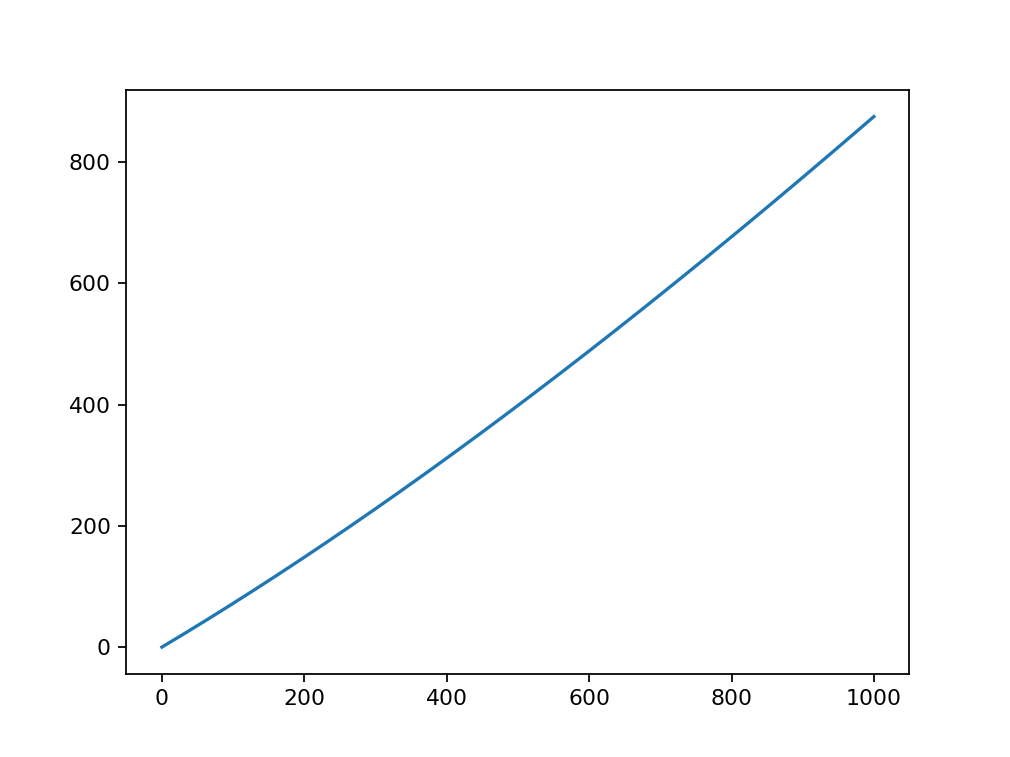

In [7]:
fig_1, ax = plt.subplots(1,1)
ax.plot(B_range, data_range_B_offset[3])
plt.show()

To show all traces:

<IPython.core.display.Javascript object>


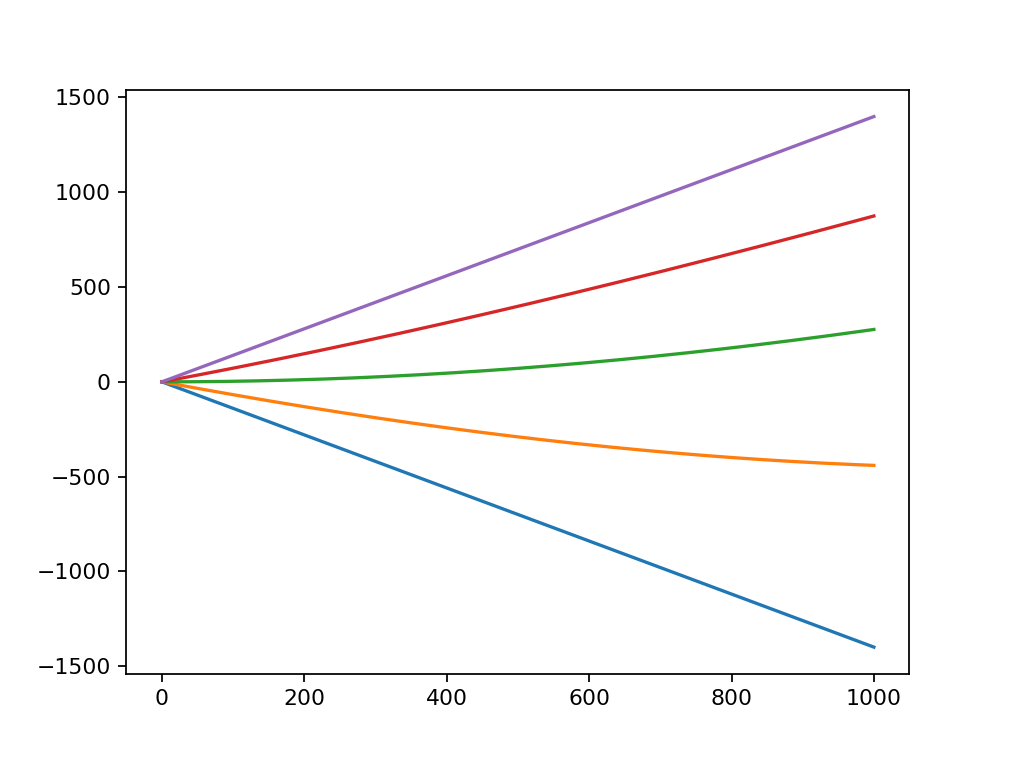

In [8]:
fig_2, ax = plt.subplots(1,1)
ax.plot(B_range, data_range_B_offset.T)
plt.show()

# 2.) use the numerical calculation

In [9]:
B = 35 # G
atom = sp.K40_4P_J32()

data_single_B_num = sp.E_hf_numerical(B, atom)
offset_single_B_num = sp.E_hf_numerical(0, atom)

Here, `data` is structured differently. The whole manifold is calculated at once, so all mF states of all F states are contained in `data`, which sums up to 36 states for K40_4P_J32 in this example.
The hard part is to know which state is which.

In [10]:
data_single_B_num

array([[-145.22003348],
       [-137.73409508],
       [-129.8200858 ],
       [-121.39383448],
       [-112.33834844],
       [-102.48182512],
       [ -91.55126985],
       [ -79.05541529],
       [ -63.87681928],
       [ -45.51381142],
       [ -42.98163367],
       [ -40.35324724],
       [ -37.62432296],
       [ -34.79861908],
       [ -31.90454407],
       [ -29.38068548],
       [ -29.05273825],
       [ -26.71030106],
       [   9.41596251],
       [  20.68987153],
       [  28.33244278],
       [  34.00432491],
       [  38.60270558],
       [  42.5339022 ],
       [  46.00892301],
       [  49.15029286],
       [  50.90882812],
       [  52.0353623 ],
       [  68.87009875],
       [  84.13977529],
       [  97.41580709],
       [ 109.23037538],
       [ 119.94507234],
       [ 129.80392324],
       [ 138.97654687],
       [ 147.58500457]])

Looking at `offset` can help to group the F states.

In [11]:
offset_single_B_num

array([[-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [-47.15560268],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ -5.32531994],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 29.8222247 ],
       [ 57.73337054],
       [ 57.73337054],
       [ 57.73337054],
       [ 57.73337054],
       [ 57.73337054],
       [ 57.73337054]])

However, a problem occurs once the energies of different mF states start to cross over! Lets look at the results of a range of values for B:

In [12]:
B_range = np.linspace(0, 50, 1000) # G
atom = sp.K40_4P_J32()

data_B_range_num = sp.E_hf_numerical(B_range, atom)
offset_B_range_num = sp.E_hf_numerical(np.zeros_like(B_range), atom)

<IPython.core.display.Javascript object>


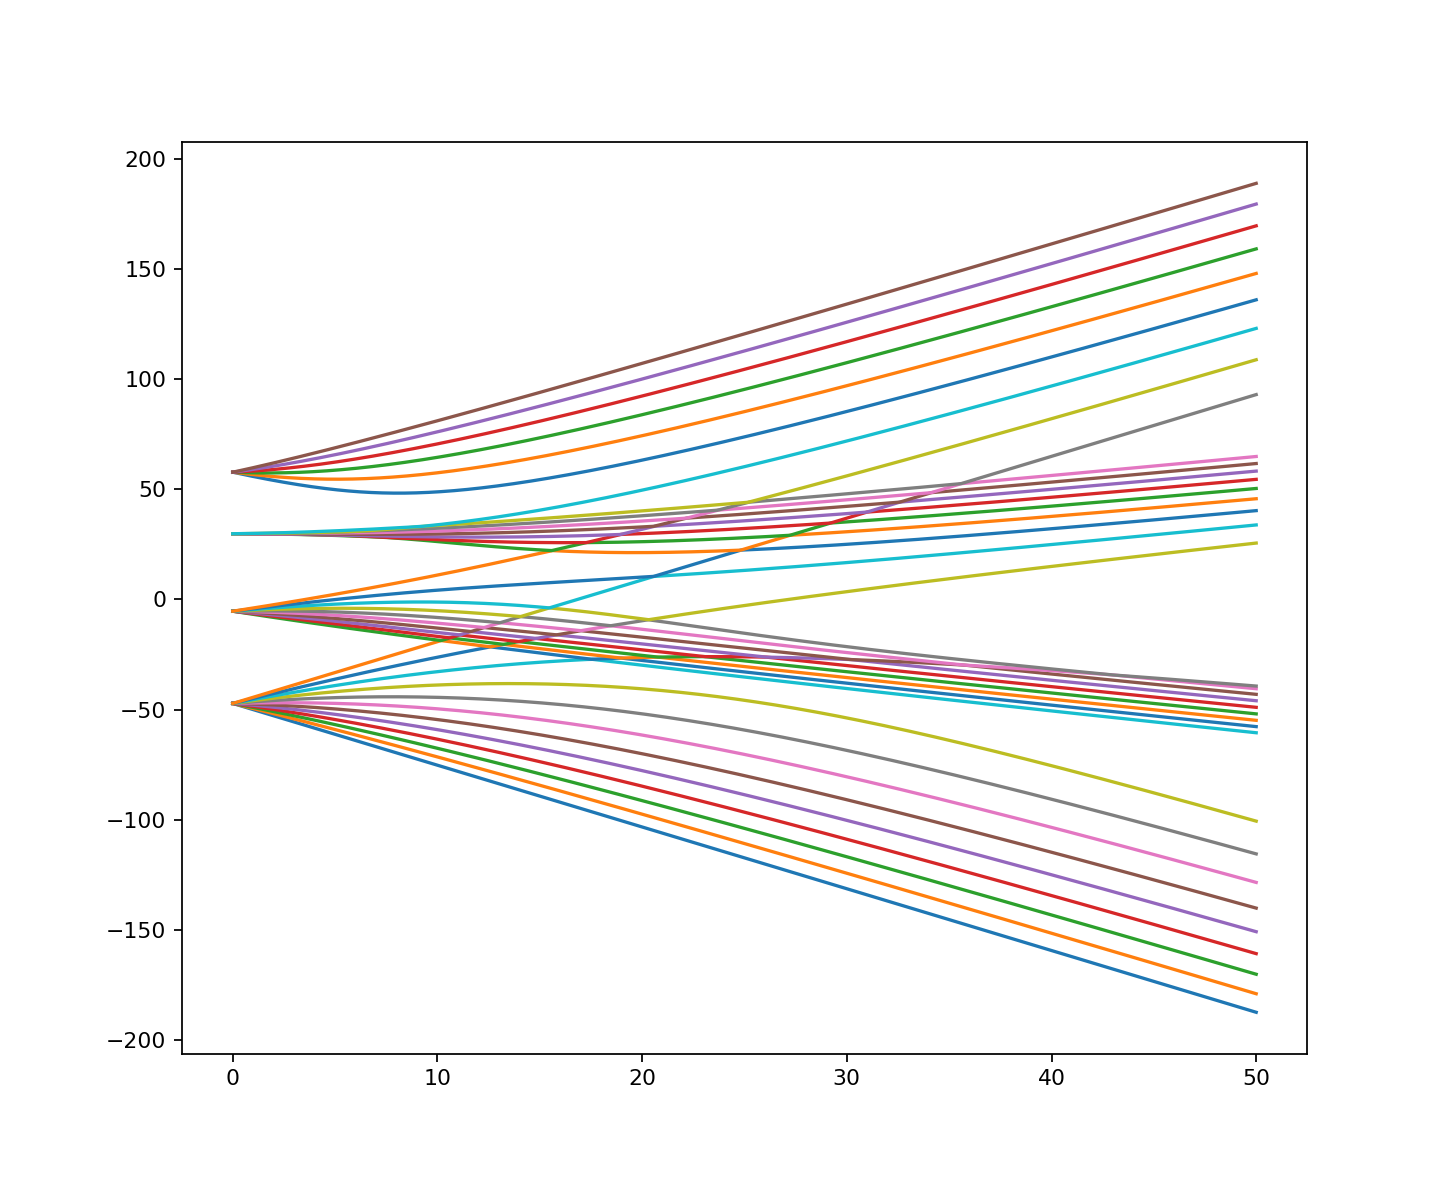

In [13]:
fig_3, ax = plt.subplots(1,1)
ax.plot(B_range, data_B_range_num.T)
plt.show()

As a human, it is easy to identify the traces of each mF state. However, the computer orders the eigenvalues by magnitude, resulting in crooked lines. This is represented by the lines changing colors once they cross each other.

To counter this, I created a function that looks at the gradients of the traces and re-orderes them:

In [15]:
B_range = np.arange(0, 50, 1e-3) # G
atom = sp.K40_4P_J32()

data_B_range_num = sp.E_hf_numerical(B_range, atom)
reordered_data = sp.correct_traces(data_B_range_num)

IMPORTANT: The function only works if the sample count of the B range is very high (here 1000 samples/G)! Also, there is an optional parameter in `sp.correct_traces(data, limit)`. If there are errors, try to change `limit`. The default is `np.abs(np.diff(data, n=2, axis=1).mean()) + np.diff(data, n=2, axis=1).std()`.

<IPython.core.display.Javascript object>


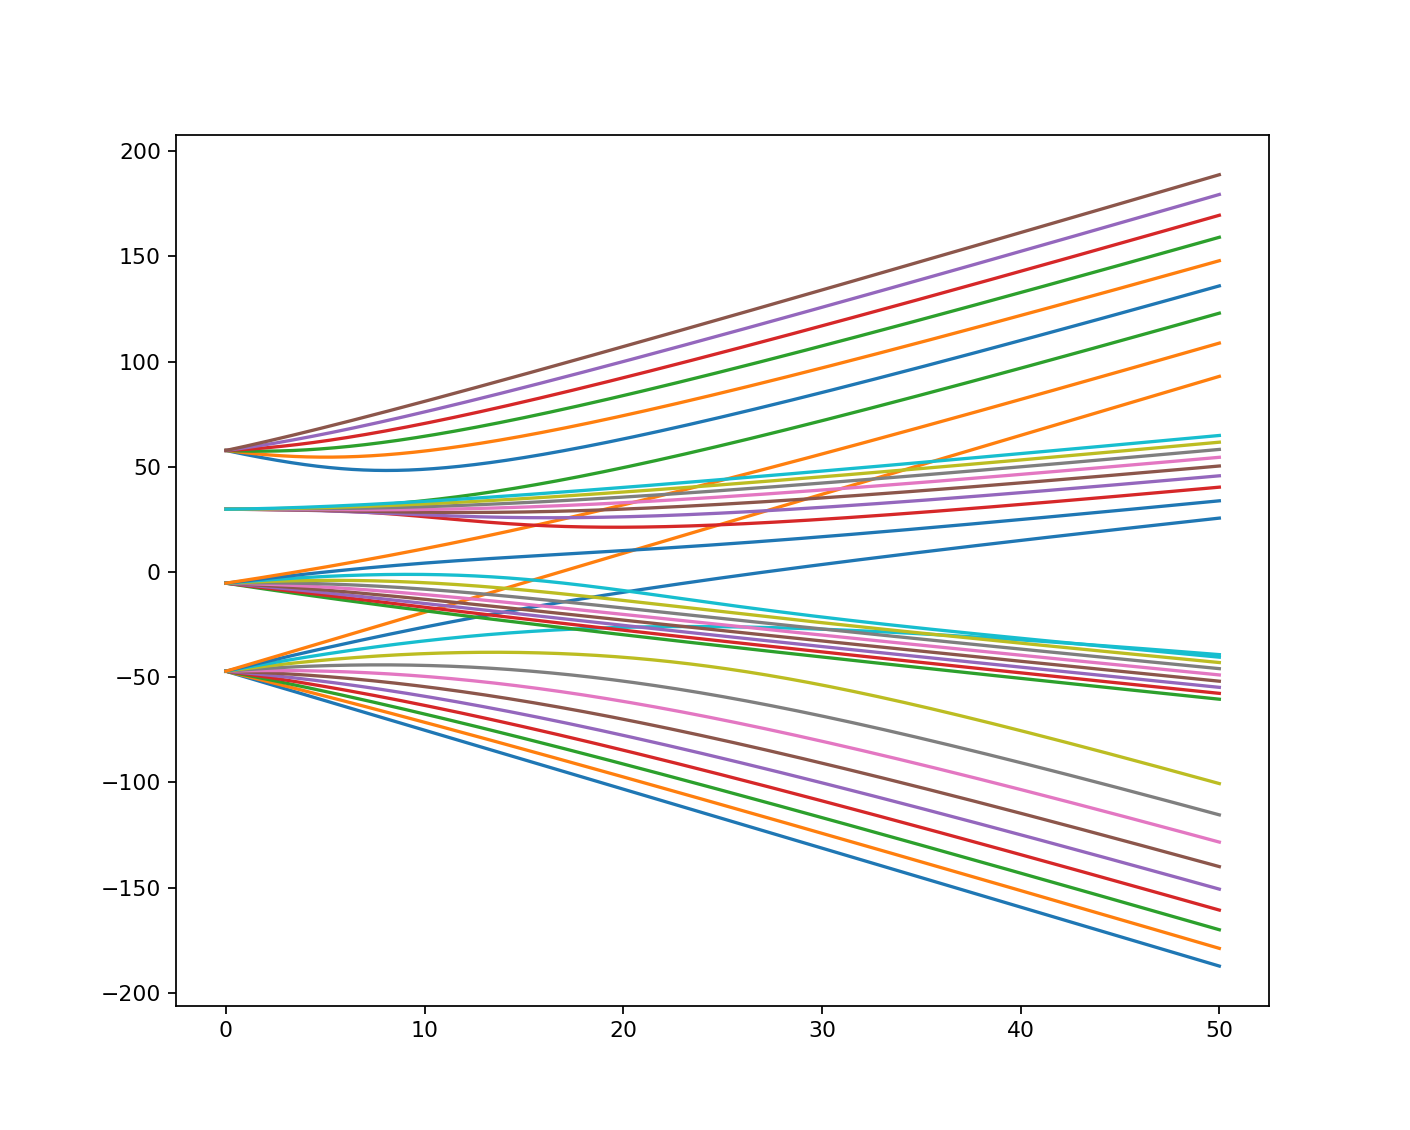

In [16]:
fig_4, ax = plt.subplots(1,1)
ax.plot(B_range, reordered_data.T)
plt.show()

As visible in the plot, the traces are smooth now. This means that a single trace will always describe the same mF state. Still, it can be hard to figure out which state is which. To identify them, look at small values of B (ca. 5G). The index of each trace corresponds to its energy, ascending upwards.

In [17]:
reordered_data

array([[ -47.15560268,  -47.15840452,  -47.16120636, ..., -187.23924116,
        -187.242043  , -187.24484484],
       [ -47.15560268,  -47.15789511,  -47.16018758, ..., -178.82699255,
        -178.82974669, -178.83250084],
       [ -47.15560268,  -47.1573857 ,  -47.15916878, ..., -169.98448692,
        -169.98719443, -169.98990194],
       ...,
       [  57.73337054,   57.7337706 ,   57.73417089, ...,  169.47351861,
         169.47620122,  169.47888384],
       [  57.73337054,   57.73457047,   57.73577059, ...,  179.35533251,
         179.35804987,  179.36076723],
       [  57.73337054,   57.73537032,   57.73737022, ...,  188.74437925,
         188.74713608,  188.74989291]])

## Extract energies of individual mF states at specific B fields

If you are interested in |F, mF> states which cross over each other, make sure to calculate with a B range starting at 0, such that the reordering function correctly orderes the states.

Here for example of the F=11/2, mF=-11/2 state (in MHz of course):

In [18]:
reordered_data[0][np.where(B_range==45)]

array([-173.23844228])

Energy differences, here F=11/2, mF=-11/2 and mF=-9/2:

In [19]:
np.abs(reordered_data[0][np.where(B_range==45)] - reordered_data[1][np.where(B_range==45)])

array([8.15423864])